In [332]:
#연관검색 : 단어들 간의 거리로 추천 시스템

#판다스, 넘파이
import pandas as pd
import numpy as np

import platform
#그래프
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

#크롤링
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [333]:
html = 'https://kin.naver.com/search/list.nhn?query={key_word}&page={num}' #키워드와 #넘에는 변수로 넣어줄 예정
#네이버 지식인 사이트임

In [334]:
response = urlopen(html.format(num=1, key_word=urllib.parse.quote('대학원'))) #key_word = 알아서 위의 format에 맞게 넣어줌

In [335]:
response #response 객체

In [336]:
soup = BeautifulSoup(response, 'html.parser')

In [337]:
soup #크롤링한 내용들


<!DOCTYPE html>

<html lang="ko">
<head>
<meta contents="always" name="referrer"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="대학원의 지식iN Q&amp;A 검색결과입니다. 궁금증을 해결하지 못했다면 지식iN '질문하기'를 해보세요." name="description">
<meta content="width=1024" name="viewport"/>
<meta content="none" name="msapplication-config">
<link href="https://ssl.pstatic.net/static.kin/static/pc/20200722020243/css/min/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20200722020243/css/min/components.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/static.kin/static/pc/20200722020243/css/min/other.css" rel="stylesheet" type="text/css"/>
<script>
	
	var pcDomain = "kin.naver.com";
	var pcDomainWithProtocol = "https://kin.naver.com";
	var pcKinServiceProtocol = "https";

	var mobileDomain = "m.kin.naver.com";
	var mobileDomainWithProtocol = "https://m.kin.naver.com";
	var mobileKinServiceProtocol = "https";

	var uploa

In [338]:
tmp = soup.find_all('dl') #dl로 된것 찾아!

In [339]:
tmp

[<dl>
 <dt>
 <a class="_nclicks:kin.txt _searchListTitleAnchor" href="https://kin.naver.com/qna/detail.nhn?d1id=11&amp;dirId=110408&amp;docId=341877947&amp;qb=64yA7ZWZ7JuQ&amp;enc=utf8§ion=kin&amp;rank=1&amp;search_sort=0&amp;spq=0" target="_blank"><b>대학원</b> 입학 질문있는데요</a>
 </dt>
 <dd class="txt_inline">2019.12.05.</dd>
 <dd>... <b>대학원</b>까지 나오고 싶어서 <b>대학원</b> 입학 관련 상담을 좀 받아보고 싶어서요.... <b>대학원</b> 입학 관련 상담 좀 도와주세요. 안녕하세요, EASYS TEAM ZOZO 입니다. <b>대학원</b> 입학 관련... </dd>
 <dd class="txt_block">
 <a class="txt_g1 _nclicks:kin.cat1" href="/search/list.nhn?query=%EB%8C%80%ED%95%99%EC%9B%90§ion=qna">Q&amp;A</a>
 								
 									 &gt; <a class="txt_g1 _nclicks:kin.cat2" href="/search/list.nhn?query=%EB%8C%80%ED%95%99%EC%9B%90§ion=qna&amp;dirId=110408">대학 입시, 진학</a>
 <span class="bar">|</span>
 <span class="hit">답변수 1</span>
 							
 							 추천수 0
 							
 								<span class="bar">|</span>
 								
 								
 									답변 
 								
 								
 									
 									
 										<img alt="TOP 

In [340]:
tmp_list = []    

In [341]:
for line in tmp:
    tmp_list.append(line.text) #크롤링한 내용들 리스트 -> 인덱스로 꺼내서 텍스트만 입력

In [342]:
tmp_list

['\n\n대학원 입학 질문있는데요\n\n2019.12.05.\n... 대학원까지 나오고 싶어서 대학원 입학 관련 상담을 좀 받아보고 싶어서요.... 대학원 입학 관련 상담 좀 도와주세요. 안녕하세요, EASYS TEAM ZOZO 입니다. 대학원 입학 관련... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 대학 입시, 진학\n|\n답변수 1\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t|\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t답변 \n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t국사ZOZO(choy****)\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n상담심리교육대학원 비전공자?\n\n2020.07.10.\n상담심리교육대학원 진학하려는데 비전공자여서 망설이고 있습니다 알아보니 상담심리교육대학원은 관련학위가... 상담심리교육대학원 진학 할 수 있을까요? 저는... \n\n#상담심리교육대학원\n#상담심리교육대학원진학\n#상담심리교육대학원준비\n#상담심리교육대학원입학조건\n#상담심리교육대학원양성과정\n#상담심리교육대학원입학\n#상담심리교육대학원상담\n#상담심리\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 대학공부\n|\n답변수 1\n\t\t\t\

In [343]:
from tqdm import tqdm_notebook #노트북에 타이머를 답니다. (progress bar)

In [344]:
present_candi_text = [] #크롤링 한 데이터 중에서, 텍스트만 추출하여 누적시킬 리스트(모든페이지)

In [345]:
for n in tqdm_notebook(range(1, 100, 1)): #진행할때마다 진행바가 돌아감 // range 는 1~100페이지, 1페이지씩 돌아감
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('대학원'))) #key_word = 알아서 위의 format에 맞게 넣어줌
    
    soup = BeautifulSoup(response, 'html.parser')
    
    tmp = soup.find_all('dl') #dl로 된것 찾아!
    
    for line in tmp:
        present_candi_text.append(line.text) #크롤링한 내용들 리스트 -> 인덱스로 꺼내서 텍스트만 입력
    
    time.sleep(0.5) # 프로그레스 바 천천히 돌아가게 만듦
    

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [346]:
present_candi_text #99페이지까 네이버 지식인 크롤링

['\n\n대학원 입학 질문있는데요\n\n2019.12.05.\n... 대학원까지 나오고 싶어서 대학원 입학 관련 상담을 좀 받아보고 싶어서요.... 대학원 입학 관련 상담 좀 도와주세요. 안녕하세요, EASYS TEAM ZOZO 입니다. 대학원 입학 관련... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 대학 입시, 진학\n|\n답변수 1\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t|\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t답변 \n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t국사ZOZO(choy****)\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n상담심리교육대학원 비전공자?\n\n2020.07.10.\n상담심리교육대학원 진학하려는데 비전공자여서 망설이고 있습니다 알아보니 상담심리교육대학원은 관련학위가... 상담심리교육대학원 진학 할 수 있을까요? 저는... \n\n#상담심리교육대학원\n#상담심리교육대학원진학\n#상담심리교육대학원준비\n#상담심리교육대학원입학조건\n#상담심리교육대학원양성과정\n#상담심리교육대학원입학\n#상담심리교육대학원상담\n#상담심리\n\n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 대학공부\n|\n답변수 1\n\t\t\t\

In [347]:
len(present_candi_text) #99페이지당 100개 ->

990

In [348]:
import nltk #natural language 말뭉치 -> (단어 수의 빈도수를 세거나) 자연어처리 해주기 위한 라이브러리

In [349]:
from konlpy.tag import Twitter;
t= Twitter()
#말뭉치에서 단어, '한국어' 단어들을 추출해주는 라이브러리(=tokenizer), 형태소

C:\Program Files\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [350]:
present_text = ''
for each_line in present_candi_text:
     present_text = present_text + each_line + '\n'

In [351]:
tokens_ko = t.morphs(present_text)
tokens_ko

['\n\n',
 '대학원',
 '입학',
 '질문',
 '있는데요',
 '\n\n',
 '2019.12',
 '.',
 '05',
 '.',
 '\n',
 '...',
 '대학원',
 '까지',
 '나오고',
 '싶어서',
 '대학원',
 '입학',
 '관련',
 '상담',
 '을',
 '좀',
 '받아',
 '보고',
 '싶어서요',
 '....',
 '대학원',
 '입학',
 '관련',
 '상담',
 '좀',
 '도와주세요',
 '.',
 '안녕하세요',
 ',',
 'EASYS',
 'TEAM',
 'ZOZO',
 '입니다',
 '.',
 '대학원',
 '입학',
 '관련',
 '...',
 'Q',
 '&',
 'A',
 '\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t ',
 '>',
 '대학',
 '입시',
 ',',
 '진학',
 '\n',
 '|',
 '\n',
 '답변',
 '수',
 '1',
 '\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t',
 '0',
 '\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t',
 '|',
 '\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t',
 '답변',
 '국사',
 'ZOZO',
 '(',
 'choy',
 '****)',
 '\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\n\n\n',
 '상담',
 '심리',
 '교육대학',
 '원',
 '비',
 '전공자',
 '?',
 '\n\n',
 '2020.07',
 '.',
 '10',
 '.',
 '\n',
 '상담',
 '심리',
 '교육대학',
 '원',
 '진학',
 '하려는데',
 '비',
 '전공자',
 '여서',
 '망설이고',
 '있습니다',
 '알아보니',
 '상담',
 '심리',
 '교육대학',
 '원',
 '은',
 '관련',
 '학위',
 '가',
 '...'

In [352]:
ko = nltk.Text(tokens_ko, name = '여자 친구 선물') #토큰으로 끊어놓은 것들의 길이나 빈도수를 체크함

In [353]:
len(ko.tokens)

78017

In [354]:
len(set(ko.tokens)) #중복된거 삭제

4372

In [355]:
ko.vocab().most_common(5) #제일 빈도수 많은 것

[('\n', 6941), ('대학원', 3265), ('.', 2416), ('...', 1929), ('답변', 1803)]

In [356]:
ko.vocab().most_common(100) #제일 빈도수 많은 것

[('\n', 6941),
 ('대학원', 3265),
 ('.', 2416),
 ('...', 1929),
 ('답변', 1803),
 ('|', 1755),
 ('진학', 1529),
 ('수', 1287),
 ('을', 1031),
 ('Q', 997),
 ('>', 997),
 ('A', 996),
 ('&', 994),
 ('\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t ', 990),
 ('\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t', 990),
 ('\n\n', 956),
 ('학점은행제', 951),
 ('원', 941),
 ('교육대학', 849),
 (',', 807),
 ('0', 795),
 ('에', 788),
 ('(', 774),
 ('\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t', 765),
 ('\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t', 765),
 ('****)', 726),
 ('\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\n\n\n',
  726),
 ('\n\n\n', 715),
 ('이', 704),
 ('1', 703),
 ('상담', 635),
 ('?', 630),
 ('심리', 559),
 ('유아교육', 520),
 ('교육', 480),
 ('가', 459),
 ('학사', 399),
 ('제', 374),
 ('대학', 345),
 ('하고', 321),
 ('심리학', 321),
 ('준비', 305),
 ('를', 295),
 ('제도', 295),
 ('은', 281),
 ('방법', 280),
 ('조건', 280),
 ('2', 276),
 ('행정', 273),
 ('로', 256),
 ('으로', 231),
 ('입학', 230),
 ('과정', 228),
 ('2020.06', 225),
 ('\

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


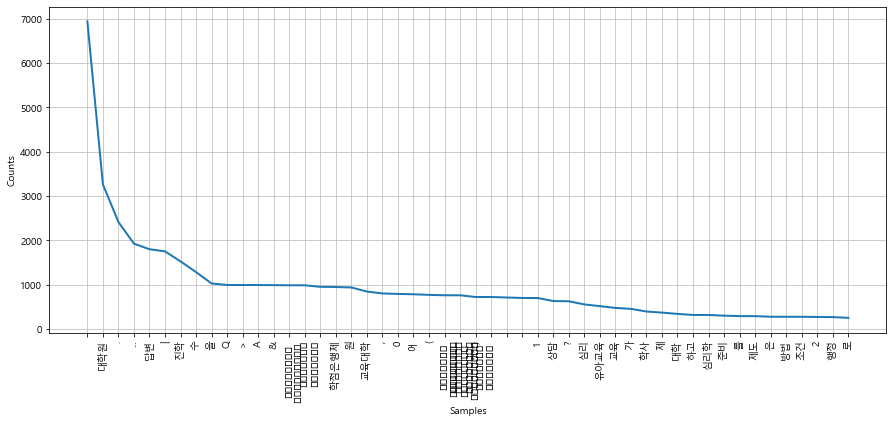

In [357]:
plt.figure(figsize=(15,6))
ko.plot(50) #50개 빈도수로 y

In [358]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #워드클라우드 관련 라이브러리
from PIL import Image

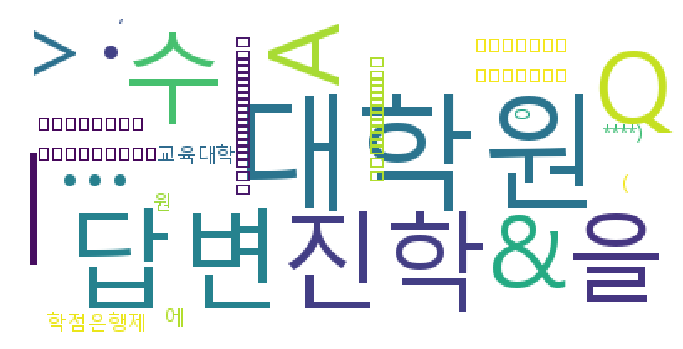

In [359]:
data = ko.vocab().most_common(150)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [360]:
!pip install gensim
 #연관검색 유사도 검색할 수 있는 라이브러리

In [361]:
import gensim #단어빼기
from gensim.models import word2vec #유클리안 거리로 말뭉치중에서 '가까이' 있는 단어를 찾아주고 -> 연관도가 높음
#연관성 있는 단어를 찾아주는 함수를 가지고 있음

#원핫 인코딩 -> 1/0 True/False로 단어나 피처가 있음을 표시하는 것

In [362]:
#단어들의 조사, 어미, 접두사 등을 빼고 다시 리스트를 만듦
#한국어는 꼭 그런 작업을 거쳐줘야함. 그래야 정확도가 높음

In [363]:
results = []
lines = present_candi_text

In [364]:
# for line in present_candi_text:
#     malist = t.pos(line, norm=True, stem=True) #pos 가 조사빼주는애임, norm -> normalization 은 ex) Adjective를 '하다'(verb) 형태로 만듦
#     print(malist)
#     results.append(malist)

In [365]:
lines = present_candi_text

for line in lines:
    malist = t.pos(line, norm=True, stem=True)
    r= []
    
    for word in malist:
        if not word[1] in ['Punctuation', 'Josa', 'URL', 'Alpha', 'Foreign', 'Number', 'Adverb', 'Adjective', 'Verb', 'Modifier']:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

대학원 입학 질문 대학원 대학원 입학 관련 상담 좀 보고 대학원 입학 관련 상담 좀 대학원 입학 관련 대학 입시 진학 답변 수 답변 국사
상담 심리 교육대학 원 비 전공자 상담 심리 교육대학 원 진학 비 전공자 상담 심리 교육대학 원 관련 학위 상담 심리 교육대학 원 진학 수 저 #상담심리교육대학원 #상담심리교육대학원진학 #상담심리교육대학원준비 #상담심리교육대학원입학조건 #상담심리교육대학원양성과정 #상담심리교육대학원입학 #상담심리교육대학원상담 #상담심리 대학 공부 답변 수 답변 교육 컨설턴트
상담 심리 교육대학 원 진학 방법 전문 상담 교사 급 자격증 취득 상담 심리 교육대학 원 상담 심리 교육대학 원 다른 대학원 들 진학 조건 게 거 #상담심리교육대학원 #상담심리교육대학원진학 #상담심리교육대학원준비 #상담심리교육대학원입학조건 #상담심리교육대학원양성과정 #상담심리교육대학원입학 #상담심리교육대학원상담 #상담심리 대학 공부 답변 수 답변 리본 교육 상 담소
대학원 진학 조건 제 학점은행제 통해 대학원 학점은행제 대학원 준비 요 먼저 대학원 진학 조건 학점은행제 학사 행정 제도 답변 수 답변
대학원 법 조건 요령 좀 대학원 법 조건 요령 좀 알 제 이번 대학원 법 지인 교수 곳 대학원 법 조건 #대학원가는법 #대학원가는 #대학원가는법비용 #대학원가는법고졸 #대학원가는법기간 #대학원가는법시간 #대학원가는법학사 #대학원가는법얼마나 #대학원가는법진행 #대학원가는법지원 학사 행정 제도 답변 수 답변 에듀 플 스
학점은행제 대학원 진학 학점은행제 대학원 진학 준비 일 학점은행제 대학원 진학 조건 수 학점은행제 대학원 진학 준비 일 직장인 #학점은행제 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원입학 #학점은행제대학원궁금 #학점은행제대학원절차 #학점은행제대학원상담 #학점은행제대학원전공 #학점은행제대학원준 노래 연주 답변 수 답변 교육 상담
상담 심리 교육대학 원 질문 상담 심리 교육대학 원 전문대 졸업 자 이 고요 상담 심리 교육대학 원 진학 루트 것 수능 볼 수 

졸 대학원 진학 방법 대학원 의미 졸 대학원 진학 방법 대한 내용 졸 대학원 진학 방법 일지 졸 대학원 진학 방법 그 중 #고졸대학원진학방법 #고졸대학원진학방법이용방법 #고졸대학원진학방법뭔가요 #고졸대학원진학방법궁금 #고졸대학원진학방법과정 #고졸대학원진학방법추천 #고졸대학원진학방법안내 #고졸대학원 대학 입시 진학 답변 수 답변 국사
심리학 대학원 법 심리학 대학원 진학 저 졸 학력 우선 심리학 대학원 진학 위 학력 조건 직장 심리학 대학원 진학 수 방법 #심리학대학원 #심리학학사학위 #심리학대학원진학 #심리학대학원준비 #심리학대학원등록금 #심리학대학원입학 #심리학대학원과정 #심리학대학원교수 #심리학대학원안내 #심리학대학원전문대졸 자동차 수리 정비 답변 수 답변 타요
상담 심리 교육대학 원 진학 조건 상담 심리 교육대학 원 진학 조건 질문 제 졸업 상담 심리 교육대학 원 상담 심리 교육대학 원 진학 조건 #상담심리교육대학원 #상담심리교육대학원진학 #상담심리교육대학원진학조건 #상담심리교육대학원입학 #상담심리교육대학원입학조건 #상담심리교육대학원심리학 #상담심리교육대학원학점은행제 교육 정책 이슈 답변 수 답변 북두칠성
학점은행제 대학원 준비 방법 학점은행제 대학원 준비 제 대학원 진학 조건 학점은행제 대학원 지원 수 학점은행제 대해 이해 전혀 #학점은행제대학원 #학점은행제대학원준비 #학점은행제대학원준비방법 #학점은행제대학원진학 #학점은행제대학원진학조건 #학점은행제대학원어디서 #학점은행제대학원취업 #학점은행제대학원합격 대학 공부 답변 수 답변 교육 컨설턴트
교육대학 원 대학교 졸업 교육대학 원 건가 대학 겨 학냔때 선발 대학원 이동 이동 졸업 대학원 사 건가 고등학교 예체능 대학 답변 수 답변 교육 컨설팅 길라잡이
학점은행제 대학원 학점은행제 대학원 준비 수 학점은행제 학사 학위 취득 대학원 기간 비용 알 학점은행제 대학원 진학 #학점은행제대학원 #학점은행제대학원고민 #학점은행제대학원기간 #학점은행제대학원궁금 #학점은행제대학원도움 #학점은행제대학원상담 #학점은행제대학원

대학원 입학 대학원 입학 준비 가장 먼저 무엇 과 공부 대학원 ㅠㅠ 특수 대학원 진학 대학교육 답변 수 답변 교육 컨설팅 길라잡이
학점은행제 대학원 입학 요즘 대학원 나머지 학점 학점은행제 학점은행제 대학원 입학 학점은행제 학위 취득 대학원 가게 불이익 #학점은행 #학점은행제 #학점은행제취득 #학점은행제방법 #학점은행제편입 #학점은향제과제 #학점은향제학사학위 #학점은행제자격증 #학점은행제상담 #학점은행제비용 대학 입시 진학 답변 수 답변 교육 미래
학점은행제 대학원 대학원 진행 학점은행제 대학원 준비 진행 기간 정도 요 그리고 학점은행제 통해 대학원 진학 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원궁금 #학점은행제대학원고민 #학점은행제대학원도움 #학점은행제대학원방법 #학점은행제대학원어떻게 #학점은행제대학원진학준비 #학 학사 행정 제도 답변 수 답변 호랑
학점은행제 대학원 지금 바로 학점은행제 진짜 이 것 학사 학위 학점은행제 대학원 대학원 졸도 수가 저 지금 바로 시작 학점은행제 대학원 #학점은행제대학원 #학점은행제대학원은 #학점은행제대학원진학 #학점은행제대학원과정 #학점은행제대학원궁금 #학점은행제대학원진행 #학점은행제대학원을 #학점은행제대학원신청 #학점은행제대 교육 정책 이슈 답변 수 답변 지식 교육 전문가
학점은행제 대학원 입학 요즘 대학원 나머지 학점 학점은행제 학점은행제 대학원 입학 학점은행제 학위 취득 대학원 가게 불이익 #학점은행제 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원입학 #학점은행제비용 #2년제졸업 #학점은행제플래너 #학은제플래너 #학은제수업 #학은제대학원비용 학사 행정 제도 답변 수 답변 에듀 플 스
학점은행제 대학원 진학 방법 학점은행제 통해 대학원 진학 준비 학점은행제 대학원 준비 학점은행제 대학원 과정 선택 진행 알 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원궁금 #학점은행제대학원고민 #학점은행제대학원비용 #학점은행제대학원기간 #학점은행제대학원플래너 #학점은행제대학원학습플래너 학사 행정 제도 답변

학점은행제 교육대학 원 제 학점은행제 교육대학 원 학점은행제 교육대학 원 정말 중 고등학교 선생님 수 졸 제 학점은행제 교육대학 원 #학점은행제교육대학원 #학점은행제교육대학원은 #학점은행제교육대학원비용 #학점은행제교육대학원기간 #학점은행제교육대학원시간 #학점은행제교육대학원면접 #학점은행제교육대학원제출서류 대학 입시 진학 답변 수 답변 ㅇ
학점은행제 심리학 대학원 고민 학점은행제 심리학 공부 겸 대학원 진학 꺼 생각 심리학 대학원 진학 생각 ㅎㅎㅎ 학점은행제 심리학 대학원 진학 교육 정책 이슈 답변 수
학점은행제 대학원 요 졸 아동 학 학위 취업 대학원 생각 학점은행제 대학원 다음 대학원 가도 학점은행제 대학원 입학 준비 학사 행정 제도 답변 수 답변 학점은행제 플 너
유아교육 대학원 진학 조건 문의 유치원 정 교사 과정 유아교육 대학원 유아교육 대학원 진학 전공 뭐 대학원 학위 #유아교육대학원 #유아교육대학원양성과정 #유아교육대학원학점은행제 #유아교육대학원진학 #유아교육대학원진학방법 #유아교육대학원진학비용 #유아교육대학원진학과정 #유아교육대학원진학조건 제 외국어 답변 수 답변 에듀 플 스
유아교육 대학원 진학 유아교육 대학원 진학 준비 주변 방통대 유아교육 대학원 진학 방법 가장 유아교육 대학원 진학 준비 수 방법 #유아교육대학원 #유아교육대학원진학 #유아교육대학원진학방법 #유아교육대학원진학조건 #유아교육대학원진학준비 #유아교육대학원진학상담 #유아교육대학원양성과정 #유아교육대학원양성과정진 대안교육 답변 수 답변 교육 상담
유아교육 대학원 진학 조건 뭔가 유아교육 대학원 진학 조건 가요 유아교육 대학원 졸업장 저 경영학 졸업 이번 유아교육 대학원 특수교육 답변 수 답변 교육 달인
학점은행제 대학원 준비 방법 학점은행제 대학원 준비 졸업 저번 년도 때 학점은행제 대학원 준비 그리고 만약 제 학점은행제 대학원 준비 시작 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원준비방법 #학점은행제대학원준비 #학점은행제대학원상담 #학점은행제대학원시작 #학점은행제대학원플

학점은행제 대학원 진학 학점은행제 대학원 진학 학위 취득 제도 하지만 온라인수업 학점은행제 대학원 진학 저 상담 심리 교육대학 원 준비 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원입학 #학점은행제대학원궁금 #학점은행제대학원비용 #학점은행제대학원상담 #학점은행제대학원수강신청 #학점은행제대학원전공 #학점 대학 입시 진학 답변 수 답변 하모니 교육 토팀
교원 자격증 교육대학 원 교육대학 원 진학 후 역사 교원 자격증 그런데 지방 국립대 교육대학 원 교직과정 중 역사 역사 과목 설치 교육대학 원 진학 대학 공부 답변 수 답변
심리학 대학원 진학 심리학 대학원 진학 심리학 대학원 진학 무조건 관련 전공 심리학 대학원 진학 좀 전체 적 요 #심리학대학원 #심리학대학원진학 #심리학대학원등록금 #심리학대학원준비 #심리학대학원진학방법 #심리학대학원진학조건 #심리학대학원진학요건 #심리학대학원입학조건 #심리학대학원입학 #심리학 교육 답변 수 답변 교육 전문가
학점은행제 대학원 진학 학점은행제 대학원 진학 학점은행제 대학원 진학 여부 대해 대학원 진학 조건 해당 동일 관련 전공 #학점은행제대학원 #학점은행제학사학위취득 #학점은행제대학원진학 #학점은행제대학원입학 #학점은행제대학원궁금 #학점은행제대학원절차 #문제풀이 제 외국어 답변 수 답변 에듀 플 스
유아교육 대학원 양성 과정 진학 방법 유아교육 대학원 양성 과정 진학 방법 학점은행제 유아교육 대학원 과정 중 선행 학위 방법 유아교육 대학원 과정 #유아교육대학원양성과정 #유아교육대학원양성과정조건 #유아교육대학원양성과정학점은행제 #유아교육대학원양성과정평생교육원 #유아교육대학원양성과정진학 #유아교육대학원양성과정기간 #유 유아교육 기관 답변 수 답변 교육 상담사
상담 심리 교육대학 원 진학 문의 상담 심리 교육대학 원 진학 상담 심리 교육대학 원 방법 뭔가 상담 심리 교육대학 원 가요 정식 교육 원 소속 #상담심리교육대학원 #상담심리교육대학원진학 #상담심리교육대학원준비 #상담심리교육대학원양성과정 #상담심리교육대학원입학조건 #

유아교육 대학원 진학 유아교육 대학원 진학 질문 유아교육 대학원 진학 아동 학 학위 유아교육 대학원 진학 방법 유아교육 대학원 진학 #유아교육대학원진학 #유아교육대학원진학방법 #유아교육대학원양성과정 #유아교육대학원 #유아교육대학원학점은행제 #유아교육대학원일반대학원 #유아교육대학원입학 #유아교육대학원지원자격 평생교육 답변 수 답변 지식인 교육 멘토 단
상담 심리 교육대학 원 법 상담 심리 교육대학 원 법 질문 저 식품 영양 졸업 상담 심리 교육대학 원 진학 상담 심리 교육대학 원 법 자격 조건 수 #상담심리교육대학원 #상담심리교육대학원가는법 #대학원가는법 #상담심리교육대학원진학조건 #학점은행제 #4년제심리학학위 #심리학학사학위 #수강신청 #범쌤 방송 통신 교육 답변 수 답변 지식 열심 답변
학점은행제 대학원 학점은행제 대학원 진학 준비 혹시 학점은행제 대학원 진학 조건 문제 불이익 학점은행제 대학원 준비 위해 학점은행제 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원조건 #대학원조건 방송 통신 교육 답변 수 답변 빈 스타일
대학원 구별 관련 질문 대학원 이면 대학교 꼭 난 다음 입학 가요 능인 대학원 대학교 입학 등급 컷 궁굼합니 만약 대학원 심리학 답변 수
유아교육 대학원 진학 조건 뭐 유치원 취업 때문 유아교육 대학원 방법 유아교육 대학원 진학 조건 혹시 진학 조건 못 유아교육 대학원 #유아교육대학원 #진학조건 방송 통신 교육 답변 수 답변 안도
학점 은행 재 대학원 진학 조건 학점은행제 대학원 진학 조건 방법 학점은행제 대학원 진학 조건 방법 학점은행제 대학원 관련 질문 답변 도움 #학점은행제대학원 방송 통신 교육 답변 수 답변 후 헤어
대학원 입학 조건 전공 무관 대학원 입학 조건 학사 학위 제 전문대 졸업 자 대학원 입학 조건 충족 혹시 지금 제 상황 대학원 입학 조건 #대학원 #대학원입학조건 #대학원입학준비 #대학원입학조건충족 #대학원입학 #대학원입학방법 #대학원입학정보 방송 통신 교육 답변 수 답변 교육 전문가
학점은행제 대학원 진학 준비 

상담 심리 교육대학 원 진학 방법 상담 심리 교육대학 원 진학 방법 학점은행제 준비 제 미용 전문대 졸업 상담 심리 교육대학 원 제 상황 상담 심리 교육대학 원 진학 준비 #상담심리교육대학원진학 #상담심리교육대학원진학준비 #상담심리교육대학원진학계획 #상담심리교육대학원진학방법 #상담심리교육대학원진학어떻게 #상담심리교육대학원진학플랜 #상담심리교육 대학 공부 답변 수 답변 멘토
유아교육 대학원 진학 준비 전공 졸업 유치 원정 교사 자격증 유아교육 대학원 진학 하 는걸 추천 유아교육 대학원 진학 준비 유아교육 대학원 교육 정책 이슈 답변 수 답변 학점은행제 학습 설계 팀
학점은행제 대학원 과정 대학 졸업 자 대학원 진학 보고 게 중 학점은행제 대학원 과정 대해 알 학점은행제 대학원 진학 #대학원 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원입학 #학점은행제대학원궁금 #학점은행제대학원절차 #학점은행제대학원상담 #학점은행제대학원전공 #학점은행제대학원취업 #학 학사 행정 제도 답변 수 답변 타요
학점은행제 대학원 진학 학점은행제 대학원 진학 대한 의문 점 질문 학점은행제 대학원 진학 위해 진행 학점은행제 대학원 진학 과정 학사 학위 #학점은행제대학원진학 #동영상답변 #지식iN동영상답변 대학 공부 답변 수 답변 고교 학습 상담
학점은행제 대학원 수 대학원 생각 중 대학원 학위 학점은행제 대학원 준비 제도 불이익 또 학점은행제 #학점은행제대학원 #학점은행제 #학점은행제편입 #학점은행제학사학위 #학점은행제학위취득 #학점은행제대학원진학 #학점은행제기간 #학점은행제비용 #학점은행제교육원 #문제풀이 교육 답변 수 답변 교육 전문가
대학교 대학원 진학 제 대학원 진학 생각 그런데 대학교 졸업 뒤 대학원 진학 때 대학교 전공 학과 대학원 수 대학교 인문과학 대학 답변 수
학점은행제 대학원 수 대학원 수 정보 학점은행제 대학원 인터넷 검색 광고 들 정보 학점은행제 대학원 관련 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원궁금 #학점은행제대학원고민 #학점은행제대학원도움

학점은행제 대학원 법 학점은행제 대학원 법 대해 도중 요 교육대학 원가 법 일반 대학원 법 학점은행제 대학원 진학 방법 가요 석사 학력 때문 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원입학 #학점은행제대학원궁금 #학점은행제대학원비용 #학점은행제대학원상담 #학점은행제대학원수강신청 #학점은행제대학원전공 #학점 대학 입시 진학 답변 수 답변 격 평생교육 원
심리 상담사 대학원 인생 심리 상담사 대학원 그냥 자격증 공부 줄 심리 상담사 대학원 전 대졸 인생 심리 상담사 대학원 가야 전 #심리상담사대학원 #심리상담사대학원진학 #심리상담사대학원준비 #심리상담사대학원은 #심리상담사대학원조건 #심리상담사대학원시작 #심리상담사대학원신청 #심리상담사대학원학점 #심리상담사 대학교육 답변 수 답변 지식 교육 전문가
상담 심리 교육대학 원 법좀 전문 상담 교사 급 취득 위해 상담 심리 교육대학 원 진학 상담 심리 교육대학 원 대한 정보 상담 심리 교육대학 원 #상담심리교육대학원 #상담심리교육대학원진학 #상담심리교육대학원준비 #상담심리교육대학원양성과정 #상담심리교육대학원입학조건 #상담심리교육대학원입학 #상담심리교육대학원입학직장인 #상 대학 공부 답변 수 답변 헤어
학점은행제 대학원 준비 방법 학점은행제 대학원 학점은행제 정말 대학원 진학 조건 수 대학원 정말 학점은행제 대학원 좀 ㅠㅠ #학점은행제대학원 #문제풀이 대학 공부 답변 수 답변 리본 교육 상 담소
대학원 이유 제목 그대로 막 대학원 간다 사람 들 왜 저 취업 공부 조금 더 대학원 생각 중 막 짤 대학원생 대학 공부 답변 수 답변 새벽
유아교육 대학원 양성 과정 유치원선생님 유아교육 대학원 가야 그냥 유아교육 대학원 유아교육 대학원 과정 가야 고 유아교육 대학원 유아교육 기관 답변 수 답변
부산대학교 유아교육 대학원 유아교육 대학원 생각 교육대학 원 진학 관련 학사 학위 과정 진행 유아교육 대학원 진학 유치 원정 교사 급 자격증 취득 방송 통신 교육 답변 수 답변 학습 플 너 김유진
상담 심리 교육대학 원 진학 대

상담 교육대학 원 진학 준비 상담 교육대학 원 진학 준비 일 상담 교육대학 원 준비 수 제 지금 직장인 상담 교육대학 원 수 학력 #상담교육대학원 #상담교육대학원진학 #상담교육대학원진학준비 #학점은행제 #교육상담사 #무료상담 #학점은행제교육상담사 #학점은행제무료상담 #직장인학위취득 #직장인무료상담 대안교육 답변 수 답변 교육 상담
유아교육 대학원 진학 대학원 진학 진학 유치 원정 교사 급 자격증 대학원 진학 국가 정식 평생교육 원 쌤 팀 장 대학원 유아교육 제도 답변 수
대학원 법 질문 대학원 법 질문 대학원 려고 졸업 대학원 법 중 대학원 법 루트 좀 수 #대학원진학 #대학원가는방법 #학점은행제 #대학원가는법 #학위취득 #대학원입학 #대학원진학조건 학사 행정 제도 답변 수 답변 멘토 하 쌤
대학원 학업 계획 대학원 학업 계획 예시 양식 때문 학업 계획 모음 예시 및 양식 포함 중앙 대학교 대학원 학업 계획 교육대학 원 어학 연수 교환학생 성균관대 학교 대학원 학업 계획 교육 학문 답변 수
경희대 경영 대학원 경희대 경영 대학원 수 제 지금 경희대 대학원 직장인 위 과정 경희대 대학원 공부 #경희대경영대학원 #경희대 #경희대학교 #경영대학원 #학점은행제 #학점은행제무료상담 #무료상담 #학점은행제교육상담사 #교육상담사 #직장인학위취득 교육 정책 이슈 답변 수 답변 교육 상담사
유아교육 대학원 진학 방법 유아교육 대학원 진학 방법 알 현재 회복 지학사 가지 유아교육 대학원 진학 방법 유아교육 대학원 절실 ㅠㅠ 학원 온라인교육 답변 수 답변 한 선생
심리학 대학원 진학 심리학 대학원 진학 제 이번 대학교 안 자퇴 학위 취득 대학원 심리학 대학원 졸업장 #심리학대학원 #심리학대학원학위취득 #심리학대학원진학 #심리학대학원비용 #심리학대학원진학방법 #심리학대학원진학조건 #심리학대학원과정 #심리학대학원준비 #심리학대학원시작 학사 행정 제도 답변 수 답변 교육 상담사 정쌤
심리학 대학원 인 서울 대학원 대학 부속 대학원 중 심리학 보유 대학원 어디가 심리학 아동 심리학 청소

아주대 학교 교육대학 원 입학 기준 아주대 학교 교육대학 원 입학 아주대 학교 교육대학 원 교육대학 원 입학 기준 최종 학력 학사 성적 점 초반 대 #아주대학교 #교육대학원 #아주대학교교육대학원 #아주대학교교대 #아주대학교학사학위 #아주대학교편입 #아주대학교진학 #교육대학원진학 #교육대학원입학 학사 행정 제도 답변 수 답변 교육
유아교육 대학원 유아교육 대학원 유아교육 대학원 수 제 졸업 유아교육 대학원 진학 때 #유아교육대학원 #유아교육대학원진학 #유아교육대학원진학방법 #유아교육대학원진학과정 #유아교육대학원진학상담 #유아교육대학원입학 #유아교육대학원진학과정학점은행제 #아동학학사학위 #유 교육 정책 이슈 답변 수 답변 교육 상담사
컴퓨터 교육대학 원 질문 컴퓨터 교육대학 원 혀 자 관련 컴퓨터 교육대학 원가 다해 진학 방법 컴퓨터 교육대학 원 진학 대한 답변 #컴퓨터교육대학원 #컴퓨터교육대학원진학 #컴퓨터교육대학원진학준비 #컴퓨터교육대학원지원자격 #컴퓨터교육대학원입학준비 #컴퓨터교육대학원입학 #컴퓨터교육대학원컴퓨터교사 #컴퓨터교사자 학사 행정 제도 답변 수 답변 학습 플 너 진쌤
학점은행제 대학원 방법 학점은행제 대학원 진학 과정 진행 위해 선 하나요 대학원 학점은행제 학사 학위 준비 학점은행제 대학원 진학 방법 대해 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원준비 #학점은행제대학원궁금 #학점은행제대학원도움 #학점은행제대학원어떻게 #학점은행제대학원과정 #학점은행제대학원고민 #학점은 학사 행정 제도 답변 수 답변 교육 상담 센터
대학원 진학 대학원 진학 때 대학원 대학교 때 학점 뿐 수업 그리고 대학원 보통 방법 진학 하나요 전적 대성 적 학업 계획 위주 #대학원진학 #대학원 #대학원입학 대학 생활 답변 수
직장인 대학원 이과 계열 야간 주말 대학원 중 이과 계열 학교 검색 찾기 야간 대학원 전국 대학원 전국 대학원 분포 #직장인 #대학원 #야간대학원 #서울 #경기 #직장인대학원 #주말대학원 방송 통신 교육 답변 수 답변 교육 컨설팅 길라잡이
유아교

대학원 진학 대학 전공 학과 학과 대학원 진학 진학 대학원 대학원 특수 대학원 인지 확인 대학 공부 답변 수
영어 교육대학 원 교육대학 원 진학 교원 자격증 목표 인대 영어 통 번역 과로 대부분 교육대학 원 영어 통 번역 대학원 차이 영어 통 번역 아마 방송 통신 교육 답변 수
반대 대학원 진학 요건 대학원 진학 요건 대해 질문 글 반대 대학원 진학 수 학교 학부 일반 대학원 진학 거 라면 희망 대학 입시 진학 답변 수
대학원 학점은행제 기계공학 취득 대학원 입학 대학원 폴리텍 대학 성적 대학원 원서 때 성적 증명서 제출 학사 행정 제도 답변 수
일본 대학원 진학 대해 일본 대학원 진학 제 그 대학원 시험 응시 수 문과 일본 평생 일 수 직장 위해 일본 대학원 전공 #일본 #문과 #일본취업 #일본대학원 #일본대학교진학 #일본대학 일본어 공부 시험 답변 수 답변 마유 박사
학점 은행 학사 대학원 질문 그대로 학점 은행 학사 대학원 진학 대학원 진학 제 초대 졸 학점 은행 학사 대학원 비용 얼마나 #학점은행학사 #학점은행제학사학위 #학점은행제학위취득 #학점은행제 대학 입시 진학 답변 수 답변 교육 미래
한국 상담 대학원 한국 상담 대학원 어디가 그리고 한국 상담 대학원 더 외국 유학 보통 대학원 더 #상담대학원 #상담심리교육대학원 대학 학과 정보 답변 수
학점은행제 대학원 진학 기계공학 관련 대학원 진학 현재 계획 취득 대학원 진학 것 학점은행제 대학원 진학 혹시 학점은행제 대학원 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원진학방법 #학점은행제대학원진학인서울 기계공학 답변 수 답변 학점은행제 플 너
교육대학 원 교원 자격증 쪽 대학원 진학 요 꼭 영어 교육 안 나 그리고 대학원 진학 위해 조건 대학원 좀 그리고 대학원 유아교육 제도 답변 수 답변
학점은행제 대학원 수 학점은행제 대학원 학점은행제 대학원 방법 또 학력 높이 학점은행제 대학원 거 대학교육 답변 수 답변 교육 컨설턴트
대학원 학력 식품 쪽 대학원 희망 제 대학원 수 학력 더 곳 가야 요 질

직장인 대학원 진학 컨설팅 직장인 대학원 진학 문제 제 학력 직장인 대학원 관련 전문 컨설팅 분 들 직장인 대학원 컨설팅 방송 통신 교육 답변 수 답변 국사
교대 교육대학 원 교대 교육 대학원 차이점 뭔가 교육대학 원 나 초등 교사 수 네 교직이수 대학원 진학 다만 교직이수 대학 입시 진학 답변 수
대학원 편입 질문 내공 대학원 상담 학과 진학 현재 학 사실 대학원 심리상담 학과 이 모집 정원 터 일단 대학원 학사 행정 제도 답변 수 답변 지식 상담사
학점은행제 대학원 가능성 제 학점은행제 시작 대학원 준비 생각 학점은행제 대학원 준비 학점은행제 대학원 대해 그리고 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원입학 #학점은행제대학원고졸 #학점은행제대학원방법 #학점은행제대학원준비 #학점은행제대학원시작 #학점은행제대학원신청 #학점은행 교육 정책 이슈 답변 수 답변 지식 교육 전문가
미국 대학원 질문 대학원 관 질문 요 미국 대학원 대학교 들 동아리 축제 체육대회 미국 대학원 유학 계획 질문 아래 정규 유학 답변 수
학점은행제 대학원 학점은행제 대학원 관련 질문 저 전문대 졸업 상태 대학원 학점은행제 대학원 수 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원입학 #학점은행제대학원궁금 #학점은행제대학원비용 #학점은행제대학원상담 #학점은행제대학원수강신청 #학점은행제대학원전공 #학점 학사 행정 제도 답변 수 답변 사이버 평생교육 원
학점은행제 대학원 기간 대학원 진학 학점은행제 대학원 과정 전체 학습 기간 얼마나 학습 기간 문제 학점은행제 대학원 과정 진행 간 정도 비용 방송 통신 교육 답변 수 답변 국사
학점은행제 대학원 학점은행제 대학원 학점은행제 대학원 학사 학위 저 학점은행제 대학원 학습 과정 해 #학점은행제대학원 #학점은행제대학원고민 #학점은행제대학원기간 #학점은행제대학원학사학위 #학점은행제대학원진학 #학점은행제대학원진학조건 #학점은행제대학원준비 #학점은행제대학원궁금 학사 행정 제도 답변 수 답변 호랑
유아교육 대학원 유치원 선생님 대충 바로

학점은행제 대학원 진학 방법 학점은행제 대학원 진학 방법 학점은행제 대학원 진학 커리큘럼 학점은행제 대학원 진학 과정 진행 학점은행제 대학원 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원전문대졸 #학점은행제대학원진학방법 #학점은행제대학원투쌤 교육 연구 학문 답변 수 답변 교육 상담사
대학원 진학 대학원 진학 진학 조건 졸업 그리고 대학원 지원 원서 한번 군데 수 김효 대학원 진학 조건 학사 학위 대학 입시 진학 답변 수
상담 심리 교육대학 원 진학 상담 상담 심리 교육대학 원 진학 상담 제 대학교 졸업 상담 심리 교육대학 원 진학 상담 심리 교육대학 원 진학 조건 #상담심리교육대학원진학 #상담심리교육대학원 #상담심리교육대학원진학준비 #상담심리교육대학원진학상담 #상담심리교육대학원진학상담원 #상담심리교육대학원학점은행제 생활 중국어 회화 답변 수 답변 북두칠성
직장인 대학원 직장인 대학원 통 수 꿈 위해 직장인 대학원 야간 과정 시작 혹시 직장인 대학원 나이 제한 이 게 #문제풀이 대학 공부 답변 수 답변
학사 학위 갈수 대학원 학사 학위 이후 대학원 진학 목표 수 대학원 알 대학원 방통대 이외 대학원 무슨 갈수 #대학원진학 #대학원 #학점은행 방송 통신 교육 답변 수 답변 최민수
유아교육 대학원 졸업 대학원 유아교육 대학원 유아교육 학사 과정 정 교사 자격증 취득 위 유아교육 대학원 진학 것 유아교육 제도 답변 수
대학원 진학 학점 은행 대학원 진학 관련 질문 제 유아교육 대학원 진학 이제 대학원 슬슬 것 뭘 준비 #학점은행제 #대학원진학 #유아교육대학원양성과정 학사 행정 제도 답변 수
일반 심리 상담사 대학원 심리 상담사 대학원 검색 전부 교육대학 원 진학 관해 얘기 경우 교육대학 원 진학 하나요 일반 대학원 심리상담 전공 #심리상담 #대학원 #심리상담사 #검색질문 #통합검색궁금증 #통합검색질문하기 대학교육 답변 수 답변 학습 멘토 예은 쌤
상담 대학원 관련 대학원 학교 센터 도움 조금 부모님 반대 대학원 입시 포기 그게 지금 수학 강사 일 지금 대학

대학원 전과 대학원 재학 중 학생 대학원 재학 다른 분야 관심 전과 대학원 전과 대학원 전과 또한 학사 행정 제도 답변 수
해외 대학원 해외 취업 현지 대학원 졸업 후 취업 도움 것 작년 대학원 진학 생각 보통 대학원 들 시작 때문 현재 지원이 #워킹홀리데이 #어학연수 #유학 #해외취업 워킹홀리데이 해외 인턴쉽 답변 수 답변 팀 스카이 유학 센터
석사 대학원 진학 시기 석사 대학원 진학 희망 학기 마치 졸업 예정 보통 다른 분 들 대학원 진학 준비 얼마나 졸업 후 바로 대학원 분 들 대학교육 답변 수 답변 콘코디 국제 대학교
대학원 편입 학사 편입 대학원 편입 생각 중 하나 설명 ㅠ 대학원 편입 설명 대학원 편입 #편입 #대학원편입 #학사편입 학사 행정 제도 답변 수 답변 학 소 유튜버
학점은행제 유아교육 대학원 진학 대학원 관련 학과 진학 학점은행제 유아교육 대학원 진짜 만약 학점은행제 유아교육 대학원 진행 기간 얼마나 #유아교육대학원학점은행제 #학점은행제유아교육대학원 #학점은행제유아교육대학원진학궁금 #학점은행제유아교육대학원진학 #유아교육대학원진학방법 #유아교육대학원진학 #학점은행제 #유아교육 교육 정책 이슈 답변 수 답변 교육 상담사
학점은행제 심리학 대학원 학점은행제 심리학 학위 대학원 가야 학점은행제 심리학 마치 대학원 후 대학원 진학 저 학점은행제 #학점은행제심리학 #학점은행제심리학사 #학점은행제심리학진학 #학점은행제심리학궁금 #학점은행제심리학과 #학점은행제심리학도움 #학점은행제심리학기간 #학점은행제심리학전공 #학점은행제심 학사 행정 제도 답변 수 답변 평생교육
상담 심리 교육대학 원 진학 대학원 진학 제 경영학 졸업 상담 심리 교육대학 원 진학 상담 심리 교육대학 원 학부 관련 #상담심리교육대학원 #학점은행제 #학점은행제심리학 #학점은행제학사학위 #상담심리대학원 #학점은행제편입 #상담심리학과 #상담심리교육대학원양성과정 #상담심리교육대학원준비 #상담심리교육대 대학 입시 진학 답변 수 답변 교육 미래
심리학 대학원 심리학 대학원 인 서울 부산 부산 인근

임 상 심리 대학원 진학 관련 임 상 심리 대학원 진학 심리학 전공자 비 전공자 학위 임 상 심리 대학원 입학 반드시 심리학 학사 학위 대학원 입 심리학 답변 수
대학원 이유 제목 그대로 막 대학원 간다 사람 들 왜 저 취업 공부 조금 더 대학원 생각 중 막 짤 대학원생 대학 공부 답변 수
유아교육 대학원 진학 대학원 진학 계획 아동복 지학 할경 학점은행제 유아교육 대학원 바로 진학 보통 대학원 비용 #유아교육대학원 #학점은행제 #아동복지학과 유아교육 제도 답변 수
사이버 대학원 보건 행정학 학사 졸업 요즘 대학원 관심 대학원 과정 사이버 대학원 수 퇴근 후 저녁 시간 #사이버대학원 #대학원 #사이버 #대학원사이버과정 #사이버대학교 #사이버대학교대학원 #세종사이버대학교 #대학원진학 유아교육 기관 답변 수
유아교육 대학원 진학 대학원 진학 계획 아동복 지학 할경 학점은행제 유아교육 대학원 바로 진학 보통 대학원 비용 은어 #유아교육대학원 #학점은행제 #아동복지학과 유아교육 제도 답변 수
예술 계열 대학원 편입 편입 대학원 고민 대학원 고민 학 은제 정식 졸업 대학원 가도 학력 인정이 대학교육 답변 수
반대 대학원 진학 요건 대학원 진학 요건 대해 질문 글 반대 대학원 진학 수 학교 학부 네 대학교 조건 대입 대학원 대학 입시 진학 답변 수 답변 다윗
유아교육 대학교 대학원 대학원 바로 대학원 결정 못 유아교육 과 대학교 대학원 커트라인 것 #유아교육 #유아교육과 #대학교 #대학원 유아교육 기관 답변 수
전남대 문화 인류 고고학 대학원 전남대 대학원 ㅎㅎ 제 것 전남대 문화 인류 고고학 대학원 주말 수 일과 병행 질문 ㅎㅎ 대학원 관련 인류학 답변 수 답변
극영화 대학원 질문 선생님 대학원 대해 알 영상 대학원 연기 도 한 학교 도 한양대 동국대 중앙대 성균관대 대학원 기준 어디가 더 #한예종연기과전문사 #한예종연기과 #한양대연극영화과 #한양대연극영화과대학원 #한양대연극영화과MFA #한양대연극영화과실기석사 연극 답변 수 답변 액팅 스튜디오
대학원 선택 한 학교 대

In [366]:
#각 단어들의 형태를 분류해줌 ( Verb, Noun, Josa 등)
#빼야 될 애들 -> 
# stop = ['Punctuation', 'Josa', 'URL', 'Alpha', 'Foreign', 'Number', 'Adverb', 'Adjective', 'Verb', 'Modifier']

In [367]:
# for word in malist :
#     if not word[1] in stop : #word 는 tuple 하나 / word[1] (어제, 'noun'), 'noun' 이 인덱스 1이야 이 stop 안에 없으면 ~~
#         results.append(word[0])

In [368]:
results

['대학원 입학 질문 대학원 대학원 입학 관련 상담 좀 보고 대학원 입학 관련 상담 좀 대학원 입학 관련 대학 입시 진학 답변 수 답변 국사',
 '상담 심리 교육대학 원 비 전공자 상담 심리 교육대학 원 진학 비 전공자 상담 심리 교육대학 원 관련 학위 상담 심리 교육대학 원 진학 수 저 #상담심리교육대학원 #상담심리교육대학원진학 #상담심리교육대학원준비 #상담심리교육대학원입학조건 #상담심리교육대학원양성과정 #상담심리교육대학원입학 #상담심리교육대학원상담 #상담심리 대학 공부 답변 수 답변 교육 컨설턴트',
 '상담 심리 교육대학 원 진학 방법 전문 상담 교사 급 자격증 취득 상담 심리 교육대학 원 상담 심리 교육대학 원 다른 대학원 들 진학 조건 게 거 #상담심리교육대학원 #상담심리교육대학원진학 #상담심리교육대학원준비 #상담심리교육대학원입학조건 #상담심리교육대학원양성과정 #상담심리교육대학원입학 #상담심리교육대학원상담 #상담심리 대학 공부 답변 수 답변 리본 교육 상 담소',
 '대학원 진학 조건 제 학점은행제 통해 대학원 학점은행제 대학원 준비 요 먼저 대학원 진학 조건 학점은행제 학사 행정 제도 답변 수 답변',
 '대학원 법 조건 요령 좀 대학원 법 조건 요령 좀 알 제 이번 대학원 법 지인 교수 곳 대학원 법 조건 #대학원가는법 #대학원가는 #대학원가는법비용 #대학원가는법고졸 #대학원가는법기간 #대학원가는법시간 #대학원가는법학사 #대학원가는법얼마나 #대학원가는법진행 #대학원가는법지원 학사 행정 제도 답변 수 답변 에듀 플 스',
 '학점은행제 대학원 진학 학점은행제 대학원 진학 준비 일 학점은행제 대학원 진학 조건 수 학점은행제 대학원 진학 준비 일 직장인 #학점은행제 #학점은행제대학원 #학점은행제대학원진학 #학점은행제대학원입학 #학점은행제대학원궁금 #학점은행제대학원절차 #학점은행제대학원상담 #학점은행제대학원전공 #학점은행제대학원준 노래 연주 답변 수 답변 교육 상담',
 '상담 심리 교육대학 원 질문 상담 심리 교육대학 원 전문대 졸업 자 이 고요 상담

## 모델을 저장해놓고 -> 나중엔 데이터만 넣어서 예측한다.

In [369]:
#모델로 저장하는 방법

data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write('\n'.join(results)) #엔터를 쳐서 넣음

In [370]:
data = word2vec.LineSentence(data_file)
data

#단어들 간의 거리를 찾아서 예측한다.

In [371]:
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1) 
#word2vec 객체로 단어간 거리를 계산할 수 있는 형태로 만들어 둠

model.save('present_girl.model') #word2vect 객체 모델을 저장해둠

In [372]:
#KNN 방식처럼 도표상 점을 찍어두고, 가장 가까운 애들끼리 찾아간다고 생각해도 돼

In [373]:
model = word2vec.Word2Vec.load('present_girl.model') #모델 load 해서 가져온다.

In [374]:
model

In [381]:
model.most_similar(positive=['외국']) #선물과 관련된 애들

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('고등학생', 0.9696856737136841),
 ('우리나라', 0.9668338894844055),
 ('#미국대학원', 0.9274547100067139),
 ('유학', 0.9254955053329468),
 ('#미국유학', 0.9197354316711426),
 ('절차', 0.9137752056121826),
 ('#영국대학', 0.9030207395553589),
 ('#미국석사유학', 0.9022696614265442),
 ('#미국석사', 0.8982175588607788),
 ('#영국대학원', 0.896265983581543)]

In [376]:
model.most_similar(positive=['유학']) #내가 만든 말뭉치 모델에서 찾는것임

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('#미국대학원', 0.9543781876564026),
 ('#미국유학', 0.949844479560852),
 ('정규', 0.9362005591392517),
 ('#미국석사유학', 0.9344324469566345),
 ('외국', 0.925495445728302),
 ('#미국대학원유학', 0.9234039187431335),
 ('#미국석사', 0.9112222194671631),
 ('#정규유학', 0.9112164378166199),
 ('고등학생', 0.9061927199363708),
 ('해피', 0.9006208181381226)]